In [26]:
from scipy.io import wavfile
import numpy as np
import sys

import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
def analyze(input_filename):
    # define return dictionary
    retdata = {}
    randompoint = int(np.random.rand()*1000)
    
    # load the file
    sampFreq, snd = wavfile.read(input_filename)

    # normalize to values between -1 to +1
    snd = snd / (2.**15)

    # select and work with only one of the channels from now onwards
    if len(snd.shape) == 1:
        s1 = snd
    else:
        s1 = snd[:,0] 

    # time representation of the sound
    timeArray = np.arange(0, s1.shape[0], 1.0)
    timeArray = timeArray / sampFreq
    timeArray = timeArray * 1000  #scale to milliseconds
    
    # number of points for fft
    n = len(s1) 
    p = np.fft.fft(s1) # take the fourier transform 

    # only half the points will give us the frequency bins
    nUniquePts = int(np.ceil((n+1)/2.0))
    p = p[0:nUniquePts]
    p = abs(p)

    freqArray = np.arange(0, float(nUniquePts), 1.0) * float(sampFreq) / n;

    MAX_RPM = 20000
    NUM_POINTS = 50

    maxhz = MAX_RPM/60
    p[freqArray > maxhz] = 0

    plt.figure(figsize=(18,10))
    plt.plot(freqArray*60, p, color='r')
    plt.xlabel('Engine RPM')
    plt.ylabel('Signal Power (dB)')
    plt.xlim([0,MAX_RPM])
    plt.xticks(np.arange(0, MAX_RPM, MAX_RPM/NUM_POINTS), size='small',rotation=40)
    plt.grid()

    fig1 = plt.gcf()
    plt.draw()
    filename = 'static/%s.png'%randompoint
    fig1.savefig(filename, dpi=100)
    retdata['filename'] = filename

    #plt.show()

    # get the top 3 freuqenecies
    ii = np.argsort(p)[-3:]
    print(ii)
    peaks = freqArray[ii]
    #print(np.sort(peaks*60))
    retdata['frequencies'] = np.sort(peaks*60)

    return retdata

[2746 2534 2957]
{'frequencies': array([ 10798.29545455,  11701.70454545,  12600.85227273]), 'filename': 'static/639.png'}


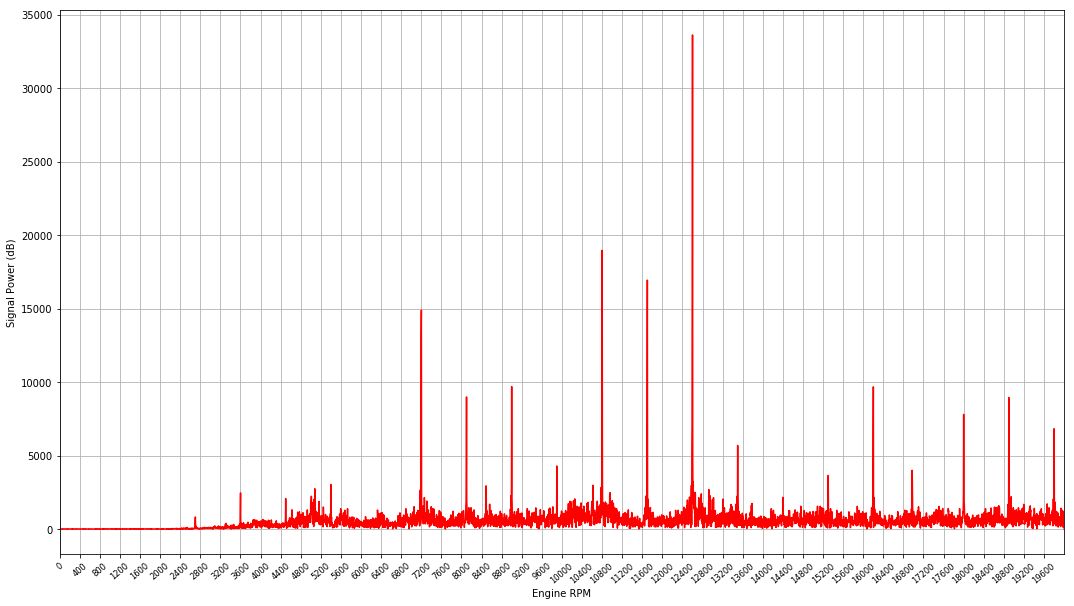

In [32]:
#AUDIO_FILE = "audio/i10car.wav"
AUDIO_FILE = "audio/Sprachmemo001.wav"
AUDIO_FILE = "audio/SX_MCE1.wav"

data = analyze(AUDIO_FILE)

print(data)

[499 495 494]
[ 1942.90453767  1946.83754281  1962.56956336]
